## **Descripción**

# **Análisis y Predicción de Precios de Autos (Core)**

**Objetivo:** 

* Aplicar técnicas de regresión lineal, KNN y árboles de decisión para predecir precios de autos utilizando un dataset de Kaggle. Realizar un 
Análisis Exploratorio de Datos (EDA) completo y comparar el rendimiento de los modelos mediante benchmarking.

**Descripción del Dataset:**

 * Este conjunto de datos contiene información detallada sobre diferentes modelos de autos, incluyendo características técnicas y precios. El objetivo es predecir el precio de los autos basándose en sus características.

# **Parte 1: Análisis Exploratorio de Datos (EDA)**

 **1. Carga y Exploración de Datos:**

In [ ]:
# Importamos librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score


In [29]:
# Cargar el dataset y revisar la estructura básica.
path = '../data/Automobile_data.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


**Limpieza de los datos**

In [30]:
# Informacion basica del dataset
for col in df.columns:
    print(f"Column: {col}, Type: {df[col].dtype}, Nulls: {df[col].isnull().sum()}")


Column: symboling, Type: int64, Nulls: 0
Column: normalized-losses, Type: object, Nulls: 0
Column: make, Type: object, Nulls: 0
Column: fuel-type, Type: object, Nulls: 0
Column: aspiration, Type: object, Nulls: 0
Column: num-of-doors, Type: object, Nulls: 0
Column: body-style, Type: object, Nulls: 0
Column: drive-wheels, Type: object, Nulls: 0
Column: engine-location, Type: object, Nulls: 0
Column: wheel-base, Type: float64, Nulls: 0
Column: length, Type: float64, Nulls: 0
Column: width, Type: float64, Nulls: 0
Column: height, Type: float64, Nulls: 0
Column: curb-weight, Type: int64, Nulls: 0
Column: engine-type, Type: object, Nulls: 0
Column: num-of-cylinders, Type: object, Nulls: 0
Column: engine-size, Type: int64, Nulls: 0
Column: fuel-system, Type: object, Nulls: 0
Column: bore, Type: object, Nulls: 0
Column: stroke, Type: object, Nulls: 0
Column: compression-ratio, Type: float64, Nulls: 0
Column: horsepower, Type: object, Nulls: 0
Column: peak-rpm, Type: object, Nulls: 0
Column: c

In [31]:
# Identificar duplicados
duplicados = df.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")

Número de registros duplicados: 0


In [32]:
# En base al dataset sabemos que tenemos valores faltantes.Convetimos ? a Nan
df.replace("?", np.nan, inplace=True)

In [33]:
# Convetimos los datos a numericos
df['normalized-losses'] = pd.to_numeric(df['normalized-losses'], errors='coerce')
df['bore'] = pd.to_numeric(df['bore'], errors='coerce')
df['stroke'] = pd.to_numeric(df['stroke'], errors='coerce')
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df['peak-rpm'] = pd.to_numeric(df['peak-rpm'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Convertimos los datos a categorias
categorical_columns = [
    'make', 'fuel-type', 'aspiration', 'num-of-doors',
    'body-style', 'drive-wheels', 'engine-location',
    'engine-type', 'num-of-cylinders', 'fuel-system'
]
for col in categorical_columns:
    df[col] = df[col].astype('category')

In [34]:
df.dtypes

symboling               int64
normalized-losses     float64
make                 category
fuel-type            category
aspiration           category
num-of-doors         category
body-style           category
drive-wheels         category
engine-location      category
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type          category
num-of-cylinders     category
engine-size             int64
fuel-system          category
bore                  float64
stroke                float64
compression-ratio     float64
horsepower            float64
peak-rpm              float64
city-mpg                int64
highway-mpg             int64
price                 float64
dtype: object

**Detección y tratamiento de valores nulos.**

In [35]:
# Verificamos los valores faltantes
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

# Fuente: Clase de Manejo de valores nulo

,datos sin NAs en q,Na en q,Na en %
normalized-losses,164,41,20.00
stroke,201,4,1.95
price,201,4,1.95
bore,201,4,1.95
horsepower,203,2,0.98
peak-rpm,203,2,0.98
num-of-doors,203,2,0.98
symboling,205,0,0.00
fuel-type,205,0,0.00
make,205,0,0.00


In [36]:
# Calculo el promedio de la columna a imputar antes de la imputación para evaluar los resultados de mi modelo
mean_before = df['normalized-losses'].mean(skipna=True)
print(f"Media antes de la imputación: {mean_before}")

Media antes de la imputación: 122.0


In [37]:
# Definimos las variables
target_col = 'normalized-losses'
features = ['wheel-base', 'length', 'width', 'curb-weight', 'engine-size']  # Adjust based on correlations

# Separamos los datos con y sin valores faltantes
train_data = df[df[target_col].notnull()]  # Rows with no missing values
test_data = df[df[target_col].isnull()]    # Rows with missing values

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train = train_data[features]
y_train = train_data[target_col]

# Entrenamos el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predecimos los datos
X_test = test_data[features]
predicted_values = model.predict(X_test)

# Remplazamos los datos
df.loc[df[target_col].isnull(), target_col] = predicted_values

# Verificamos
print(f"Missing values in '{target_col}' after imputation:", df[target_col].isnull().sum())

Missing values in 'normalized-losses' after imputation: 0


In [38]:
# Evaluamos el modelo y obtenemos los resultados. 

y_pred_train = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred_train)
print(f"Mean Squared Error for '{target_col}': {mse}")

rmse = mse ** 0.5
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error for 'normalized-losses': 1101.1273847754699
Root Mean Squared Error: 33.18323951598864


In [39]:
# Calculamos el promedio de los valores de 'normalized-losses' par
mean_normalized_losses = df['normalized-losses'].mean()
print(f"Mean of 'normalized-losses': {mean_normalized_losses}")

Mean of 'normalized-losses': 124.24270653358913


In [40]:
# Eliminamos las filas con valores nulos
new_df = df.dropna()

# Proporción de filas que se eliminarían
rows_with_nulls = df.isnull().any(axis=1).sum()
print(f"Filas con nulos restantes: {rows_with_nulls}")
print(f"Proporción de datos restantes: {(len(df) - rows_with_nulls) / len(df):.2%}")


Filas con nulos restantes: 12
Proporción de datos restantes: 94.15%


**Identificación y tratamiento de outliers.**

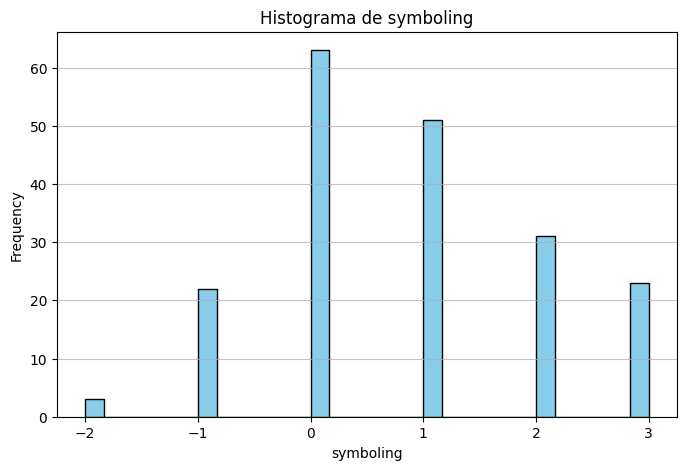

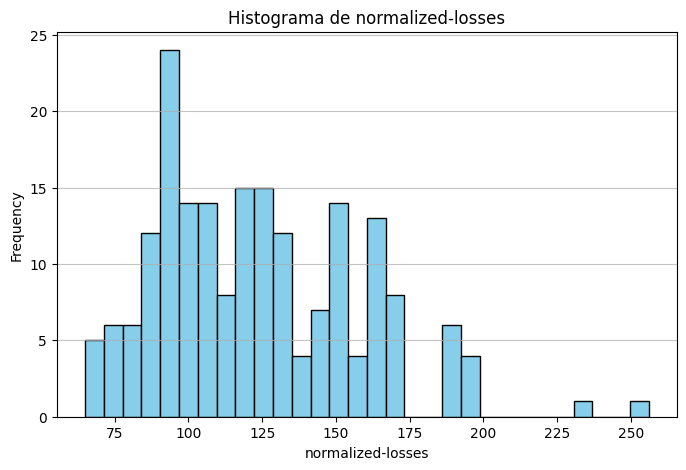

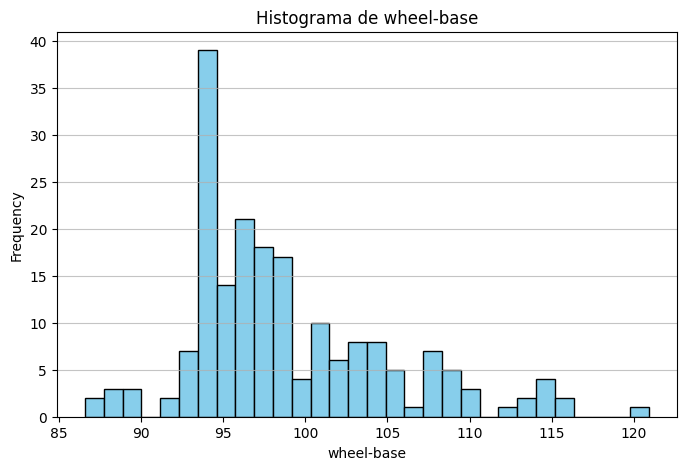

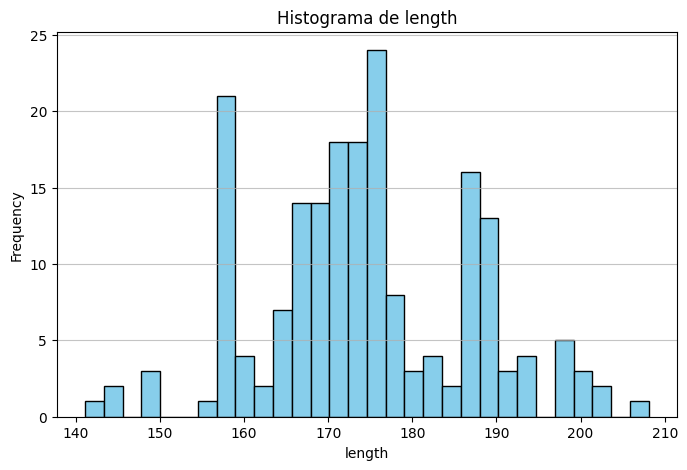

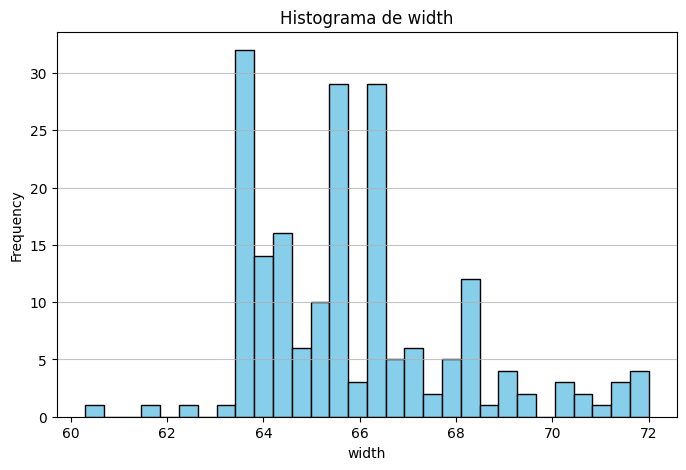

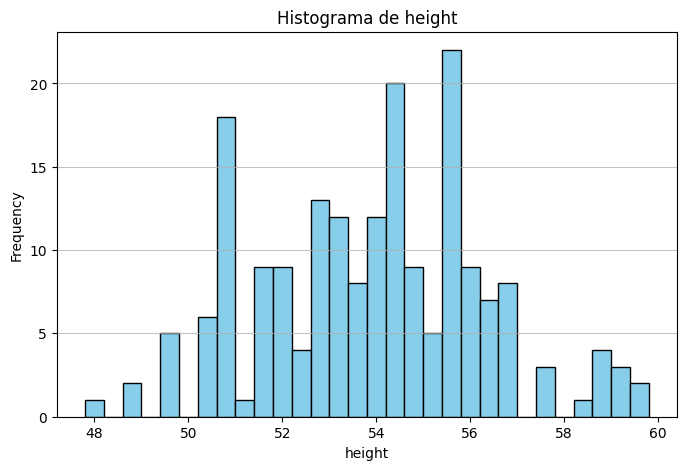

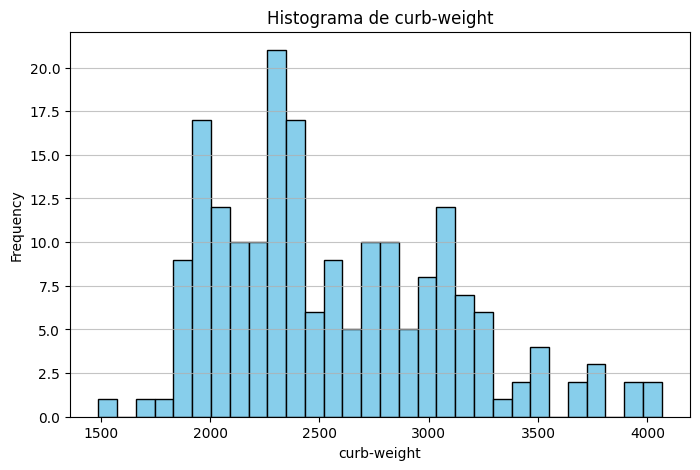

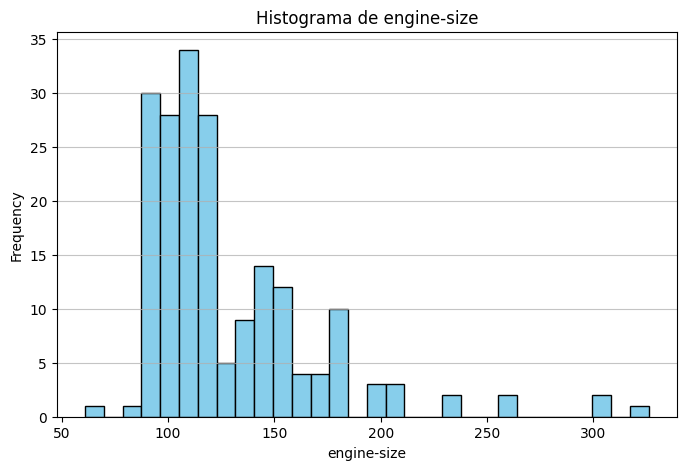

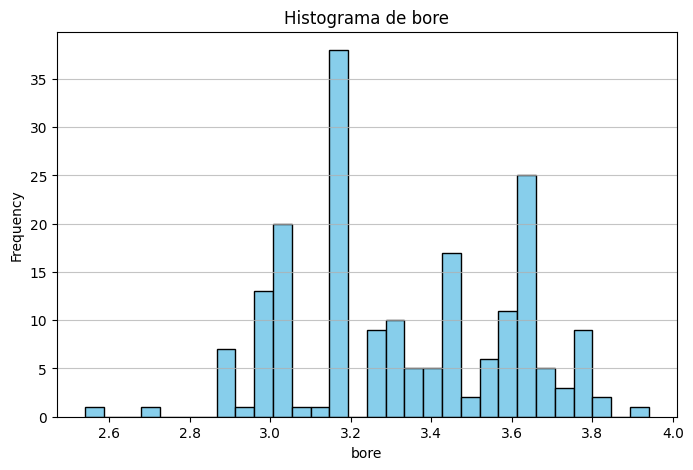

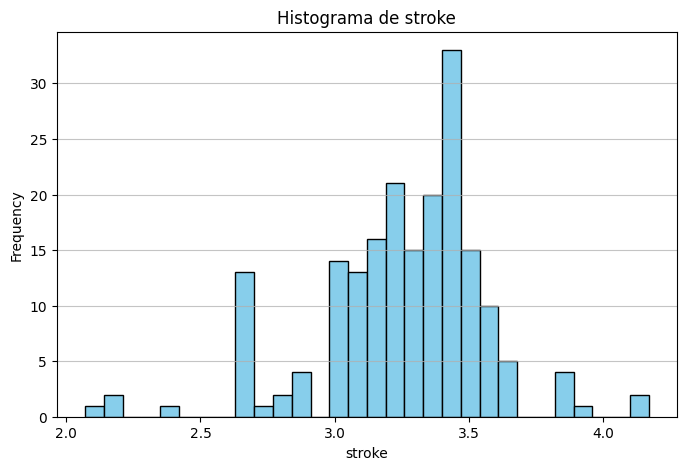

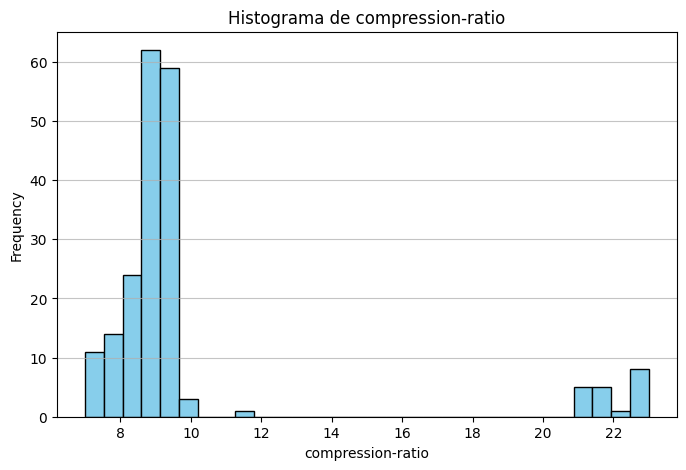

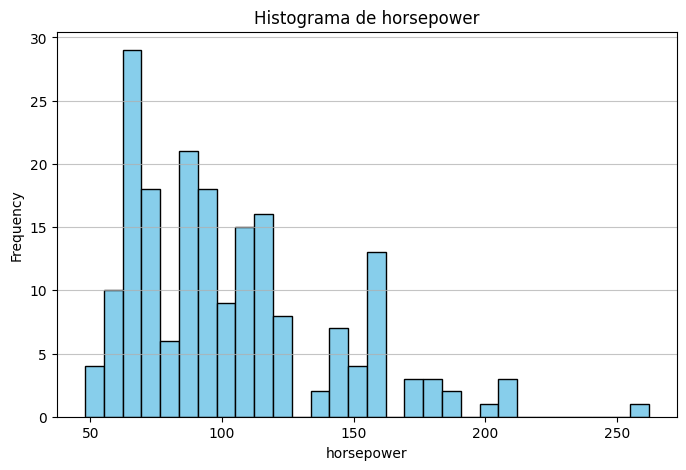

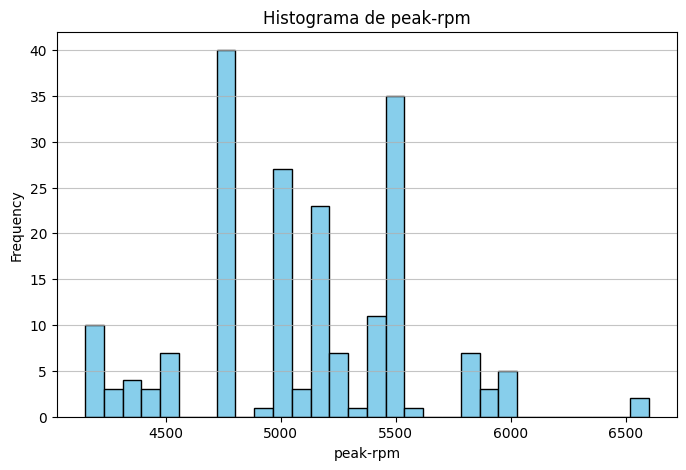

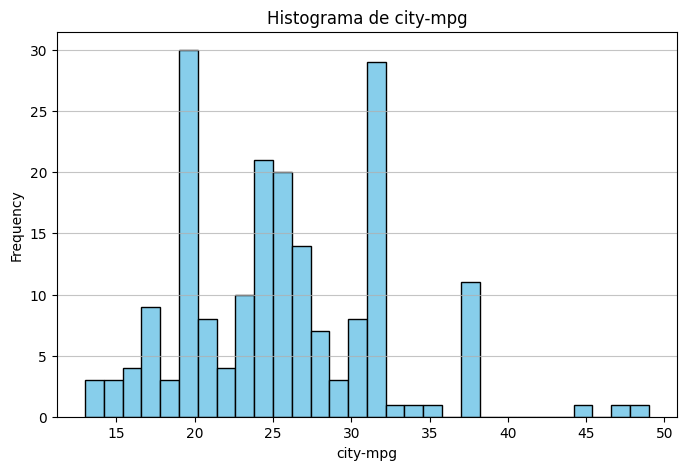

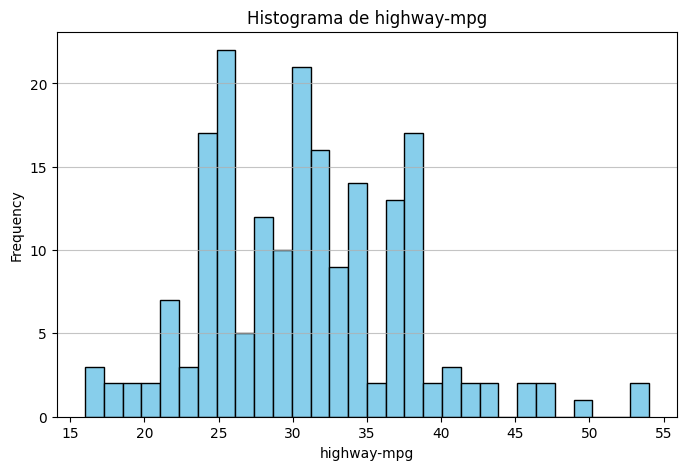

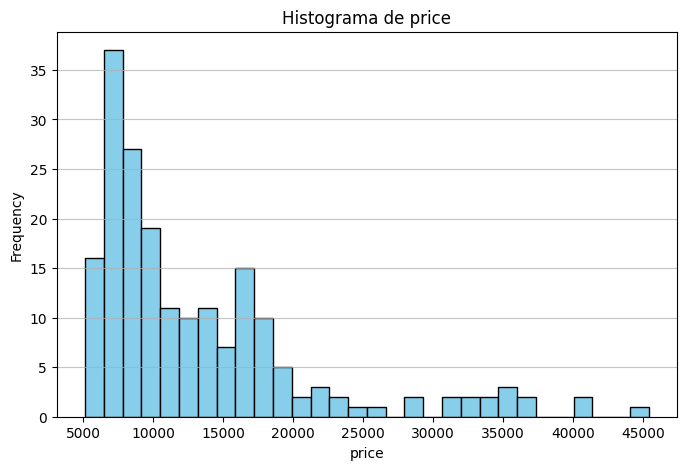

In [41]:
numerical_cols = ['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 
                'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 
                'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 
                'highway-mpg', 'price']

# Histogramas de las columnas numericas
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    plt.hist(new_df[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()


# Añadir pequeño anlisis




**Análisis de correlación entre variables.**

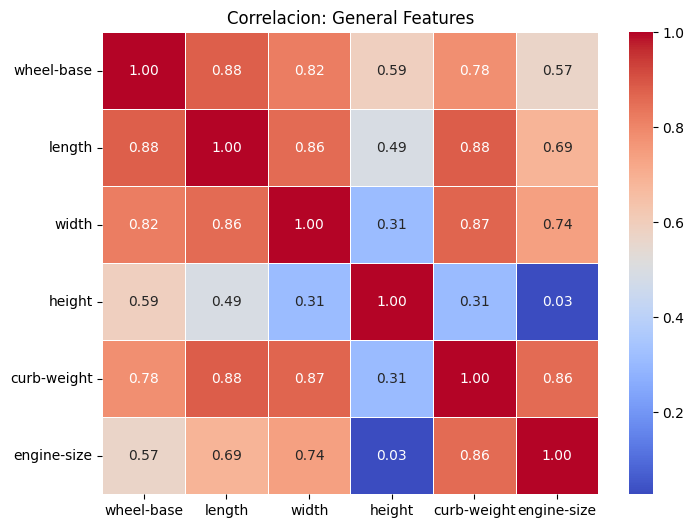

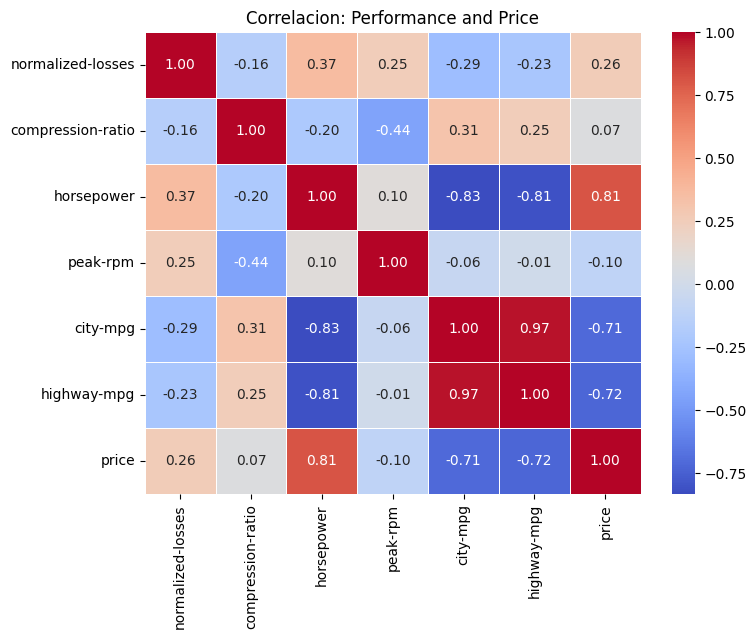

In [42]:
# Cremos dos subconjuntos, para que el heatmap se vea mejor
general_features = ['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size']
performance_price = ['normalized-losses', 'compression-ratio', 'horsepower', 'peak-rpm', 
                    'city-mpg', 'highway-mpg', 'price']

# Heatmap 1: Caracteristicas generales
plt.figure(figsize=(8, 6))
sns.heatmap(new_df[general_features].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlacion: General Features')
plt.show()

# Heatmap 2: Rendimiento y Precio
plt.figure(figsize=(8, 6))
sns.heatmap(new_df[performance_price].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlacion: Performance and Price')
plt.show()


In [44]:
# Proporción de filas que se eliminarían
rows_with_nulls = df.isnull().any(axis=1).sum()
print(f"Filas con nulos restantes: {rows_with_nulls}")
print(f"Proporción de datos restantes: {(len(df) - rows_with_nulls) / len(df):.2%}")

Filas con nulos restantes: 12
Proporción de datos restantes: 94.15%


## **Parte 2: Preparación de Datos**

###  **2. Preprocesamiento:**

In [ ]:
# Definimos las variables independientes (X) y la variable dependiente (y)
X = new_df[['engine-size', 'horsepower', 'curb-weight', 'make', 'num-of-cylinders', 'body-style']]
y = new_df['price']

# Define categorical features
categorical_features = ['make', 'num-of-cylinders', 'body-style']

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['engine-size', 'horsepower', 'curb-weight']),  # Numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # Categorical features
    ],
    remainder='drop'  
)

#  Preprocesamiento de los datos con ColumnTransformer
X_preprocessed = preprocessor.fit_transform(X)

# Dividimos los datos en Entrenamiento y Test
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)



## **Parte 3: Modelos de Regresión**

 ### **3. Regresión Lineal:**

In [ ]:
# Linear Regression 
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Predicciones
y_pred_lr = model_lr.predict(X_test)

# Evaluacionn del modelo (MSE y R²)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression - MSE:", mse_lr)
print("Linear Regression - R²:", r2_lr)

Linear Regression - MSE: 9949908.315114101
Linear Regression - R²: 0.9114579201542946


### **4. K-Nearest Neighbors (KNN):**

In [ ]:
# K-Nearest Neighbors
model_knn = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors
model_knn.fit(X_train, y_train)

# Precicciones
y_pred_knn = model_knn.predict(X_test)

# Evaluate the model (MSE y R²)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("K-Nearest Neighbors - MSE:", mse_knn)
print("K-Nearest Neighbors - R²:", r2_knn)

K-Nearest Neighbors - MSE: 31206414.829743586
K-Nearest Neighbors - R²: 0.7223008709179572


 ### **5. Árbol de Decisión:**

In [53]:
# Decision Tree 
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)

# Predicciones
y_pred_dt = model_dt.predict(X_test)

# Evaluacionn del modelo (MSE y R²)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree - MSE:", mse_dt)
print("Decision Tree - R²:", r2_dt)

Decision Tree - MSE: 7945674.083333333
Decision Tree - R²: 0.929293166646995


## **Parte 4: Benchmarking y Comparación de Modelos**



 ### **6. Comparación de Modelos:**

In [52]:
print("Comparacion de Modelos:")
print("\nLinear Regression:")
print("MSE:", mse_lr)
print("R²:", r2_lr)

print("\nK-Nearest Neighbors:")
print("MSE:", mse_knn)
print("R²:", r2_knn)

print("\nDecision Tree:")
print("MSE:", mse_dt)
print("R²:", r2_dt)


Comparacion de Modelos:

Linear Regression:
MSE: 9949908.315114101
R²: 0.9114579201542946

K-Nearest Neighbors:
MSE: 31206414.829743586
R²: 0.7223008709179572

Decision Tree:
MSE: 7945674.083333333
R²: 0.929293166646995


## **Conclusión**


 ### **7. Interpretación de Resultados:**

In [ ]:
# Creamos un dataframe de comparacion
comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'K-Nearest Neighbors', 'Decision Tree'],
    'MSE': [mse_lr, mse_knn, mse_dt],
    'R²': [r2_lr, r2_knn, r2_dt]
})

# Mostramos el dataframe de comparacion
print(comparison_df)

                 Model           MSE        R²
0    Linear Regression  9.949908e+06  0.911458
1  K-Nearest Neighbors  3.120641e+07  0.722301
2        Decision Tree  7.945674e+06  0.929293


Mejor Modelo: Árbol de Decisión

El Árbol de Decisión mostró el mejor desempeño en este caso, con el menor MSE y el mayor R². 
Aunque es el mejor aquí, es importante recordar que los Árboles de Decisión pueden sobreajustarse. Por lo tanto, evaluarlo más a fondo con validación cruzada o utilizando métodos de conjunto (como Random Forests) podría mejorar su robustez.

Segundo Lugar: Regresión Lineal

La Regresión Lineal también funciona bastante bien, con un R² alto y un MSE relativamente bajo.
Es el segundo mejor modelo aquí, pero su rendimiento predictivo no es tan fuerte como el del Árbol de Decisión.

Peor Desempeño: K-Nearest Neighbors

KNN tiene el peor desempeño con un MSE significativamente mayor y un R² más bajo.
